In [1]:
from google.cloud import storage
from pathlib import Path
import matplotlib.pyplot as plt
import os 
import pandas as pd
import csv 
import tensorflow as tf

2023-03-07 13:01:38.018224: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-07 13:01:38.277275: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-07 13:01:38.277298: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-07 13:01:40.581275: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [3]:
GCS_DATA_BUCKET="ddd_project"
GCP_PROJECT="gcp-ddd-project"
data_path = Path('~').joinpath(".lewagon", "mlops", "data","test.tif").expanduser()

In [4]:
picture_path = 'dataset/TEM virus dataset/context_virus_1nm_256x256/validation/_EXCLUDED/WestNile/2_10.tif'
storage_client = storage.Client(GCP_PROJECT)
bucket = storage_client.get_bucket(GCS_DATA_BUCKET)
picture = bucket.blob(picture_path)
picture = picture.download_to_filename(data_path)

In [5]:
image = plt.imread(picture)
plt.imshow(image)

AttributeError: 'NoneType' object has no attribute 'read'

In [5]:
RAW_DATA_PATH = '../data/TEM virus dataset/context_virus_RAW'



In [6]:
# création dictionnaire pour le train set 

#initialisation du dic 
train_data_dic = {}
list_virus = os.listdir(Path(RAW_DATA_PATH, 'train'))
for virus in list_virus:
    train_data_dic[virus] = {}

#filling the dictinary virus by virus     
for virus in list_virus: 
    path_position_file = os.path.join(RAW_DATA_PATH,'train',virus, 'particle_positions')
    list_position_file = os.listdir(path_position_file)
    #ouvrir le fichier texte
    for file in list_position_file: 
        with open(f'{path_position_file}/{file}', 'r') as f:
            lines = f.readlines()
            center_coords = []
            #récupérer les coordoonées 
            particle =[]
            for i in range(3,len(lines)):
                if lines[i] != 'particleposition\n': 
                    coordinate = tuple(lines[i].strip('\n').split(';'))                    
                    particle.append(coordinate)
                else:
                    if len(particle) == 2: 
                        print('moynne')#fiare la moyenne 
                    else: 
                        for i in particle: 
                            center_coords.append(i)
                particle = []                    
                print(center_coords)
            # #faire une liste avec les tuples
            # tuples_list = [] 
            # for center in center_coords:
            #     center = center.strip('\n').split(';')
            #     tuples_list.append(tuple(center))
            # train_data_dic[virus][file] = tuples_list

# train_data_dic['Ebola']['2540_particlepositions.txt']




[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [91]:

pic_data_dic = {}
for virus in list_virus:
    pic_data_dic[virus] =  {}
  

for virus in list_virus:
    path_tag_files = os.path.join(RAW_DATA_PATH,'train',virus, 'tags')
    list_tag_files = os.listdir(path_tag_files) 
    for file in list_tag_files:
        with open(f'{path_tag_files}/{file}', 'r') as csvfile:
            reader = csv.reader(csvfile, delimiter=';')
            all_infos = []
            for row in reader: 
                all_infos.append(row)
            file = file.rstrip('.tif_tags.csv')
            pic_data_dic[virus][file] = {}
            height = int(all_infos[0][1])
            width = int(all_infos[1][1])    
            xscale = float(all_infos[5][1].replace(',','.'))
            yscale = float(all_infos[6][1].replace(',','.'))
            pic_data_dic[virus][file]['Height'] = height
            pic_data_dic[virus][file]['Width'] = width
            pic_data_dic[virus][file]['Xscale'] = xscale
            pic_data_dic[virus][file]['Yscale'] = yscale            

In [96]:
# création dictionnaire 

def get_dic_center(): 
    
    #initialisation du dic 
    train_data_dic = {}
    list_virus = os.listdir(Path(RAW_DATA_PATH, 'train'))
    for virus in list_virus:
        train_data_dic[virus] = {}
    
    #filling the dictinary virus by virus     
    for virus in list_virus: 
        path_position_file = os.path.join(RAW_DATA_PATH,'train',virus, 'particle_positions')
        list_position_file = os.listdir(path_position_file)
        #ouvrir le fichier texte
        for file in list_position_file: 
            with open(f'{path_position_file}/{file}', 'r') as f:
                lines = f.readlines()
                center_coords = []
                file_name = file.rstrip('_particlepositons.txt')
                #récupérer les coordoonées 
                for i in range(3, len(lines), 2): 
                    center_coords.append(lines[i])
                #faire une liste avec les tuples
                tuples_list = [] 
                for center in center_coords:
                    center = center.strip('\n').split(';')
                    tuples_list.append(tuple(center))
                train_data_dic[virus][file_name] = tuples_list
                
    return train_data_dic

get_dic_center()

{'Pseudocowpox': {'1112': [('757', '220'),
   ('particleposition',),
   ('318', '850')],
  '1098': [('733', '390')],
  '1107': [('446', '345'),
   ('particleposition',),
   ('899', '310'),
   ('641', '572'),
   ('particleposition',),
   ('1190', '633'),
   ('495', '510')],
  '1134': [('483', '700'),
   ('particleposition',),
   ('557', '943'),
   ('647', '946')],
  '1120': [('330', '594'),
   ('particleposition',),
   ('508', '617'),
   ('686', '622'),
   ('particleposition',),
   ('998', '588')],
  '1090': [('618', '476')],
  '1087': [('749', '426'), ('591', '527')],
  '1110': [('153', '442'), ('particleposition',), ('274', '942')],
  '1088': [('590', '411')],
  '1132': [('706', '652'), ('particleposition',), ('715', '433')],
  '1126': [('775', '493'),
   ('particleposition',),
   ('1067', '508'),
   ('745', '255')],
  '1097': [('611', '504')],
  '1085': [('692', '453')],
  '1106': [('583', '195'),
   ('particleposition',),
   ('484', '579'),
   ('519', '764'),
   ('particleposition',

### Essaie de crop 

../data/TEM virus dataset/context_virus_RAW/train/Rift Valley/6175.tif


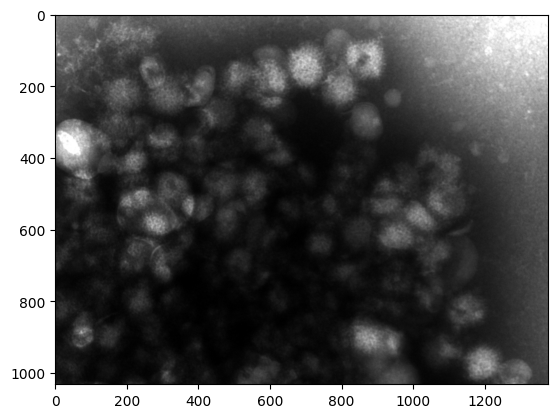

In [7]:
def load_sample(virus):
    path = os.path.join(RAW_DATA_PATH, 'train', virus)
    files = os.listdir(path)
    selected_image = os.path.join(RAW_DATA_PATH,'train',virus,'6175.tif')
    print(selected_image)
    img = plt.imread(selected_image)
    return img
plt.imshow(load_sample('Rift Valley'), cmap="gray")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/laura/.pyenv/versions/3.10.6/envs/ddd/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3218/3793406994.py", line 1, in <module>
    import tensorflow as tf
  File "/home/laura/.pyenv/versions/3.10.6/envs/ddd/lib/python3.10/site-packages/tensorflow/__init__.py", line 37, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "/home/laura/.pyenv/versions/3.10.6/envs/ddd/lib/python3.10/site-packages/tensorflow/python/__init__.py", line 37, in <module>
    from tensorflow.python.eager import context
  File "/home/laura/.pyenv/versions/3.10.6/envs/ddd/lib/python3.10/site-packages/tensorflow/python/eager/context.py", line 28, in <module>
    from tensorflow.core.framework import function_pb2
  File "/home/laura/.pyenv/versions/3.10.6/envs/ddd/lib/python3.10/site-packages/tensorflow/core/framework/fu

In [11]:
image = load_sample('Rift Valley')

target_height = 256
target_width = 256
center_point = (190, 231)
offset_height = center_point[1]+target_width/2
print(offset_height)
offset_width =  center_point[0]-target_height/2
print(offset_width)
tf.image.crop_to_bounding_box(
    image, offset_height, offset_width, target_height, target_width
)

../data/TEM virus dataset/context_virus_RAW/train/Rift Valley/6175.tif
359.0
62.0


InvalidArgumentError: Value for attr 'Index' of float is not in the list of allowed values: int32, int64
	; NodeDef: {{node Slice}}; Op<name=Slice; signature=input:T, begin:Index, size:Index -> output:T; attr=T:type; attr=Index:type,allowed=[DT_INT32, DT_INT64]> [Op:Slice]

In [ ]:
center_point = (190, 231)

offset